In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

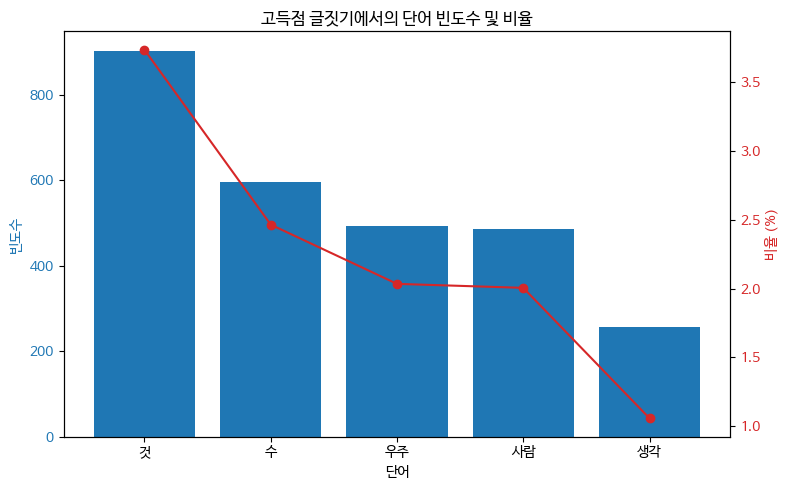

In [4]:
# 고득점 글짓기 데이터
data = {
    '것': {'count': 903, 'ratio': 3.7326},
    '수': {'count': 596, 'ratio': 2.4636},
    '우주': {'count': 492, 'ratio': 2.0337},
    '사람': {'count': 485, 'ratio': 2.0048},
    '생각': {'count': 256, 'ratio': 1.0582}
}

# 데이터 분리
words = list(data.keys())
counts = [data[word]['count'] for word in words]
ratios = [data[word]['ratio'] for word in words]

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(8, 5))

# 막대 그래프 (count)
color = 'tab:blue'
ax1.set_xlabel('단어')
ax1.set_ylabel('빈도수', color=color)
ax1.bar(words, counts, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 라인 그래프 (ratio)
ax2 = ax1.twinx()  # y축 공유
color = 'tab:red'
ax2.set_ylabel('비율 (%)', color=color)
ax2.plot(words, ratios, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('고득점 글짓기에서의 단어 빈도수 및 비율')
plt.tight_layout()
plt.show()

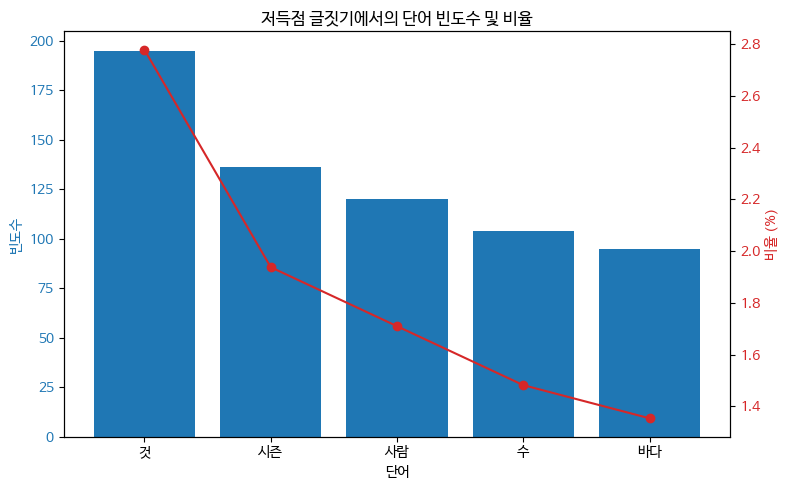

In [5]:
# 저득점 글짓기 데이터
low_score_data = {
    '것': {'count': 195, 'ratio': 2.7782},
    '시즌': {'count': 136, 'ratio': 1.9376},
    '사람': {'count': 120, 'ratio': 1.7096},
    '수': {'count': 104, 'ratio': 1.4817},
    '바다': {'count': 95, 'ratio': 1.3535}
}

# 데이터 분리
low_words = list(low_score_data.keys())
low_counts = [low_score_data[word]['count'] for word in low_words]
low_ratios = [low_score_data[word]['ratio'] for word in low_words]

# 저득점 글짓기 그래프 생성
fig, low_ax1 = plt.subplots(figsize=(8, 5))

# 막대 그래프 (count)
low_color = 'tab:blue'
low_ax1.set_xlabel('단어')
low_ax1.set_ylabel('빈도수', color=low_color)
low_ax1.bar(low_words, low_counts, color=low_color)
low_ax1.tick_params(axis='y', labelcolor=low_color)

# 라인 그래프 (ratio)
low_ax2 = low_ax1.twinx()  # y축 공유
low_color = 'tab:red'
low_ax2.set_ylabel('비율 (%)', color=low_color)
low_ax2.plot(low_words, low_ratios, color=low_color, marker='o')
low_ax2.tick_params(axis='y', labelcolor=low_color)

plt.title('저득점 글짓기에서의 단어 빈도수 및 비율')
plt.tight_layout()
plt.show()

<ipython-input-3-a85c0677fc81>:52: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


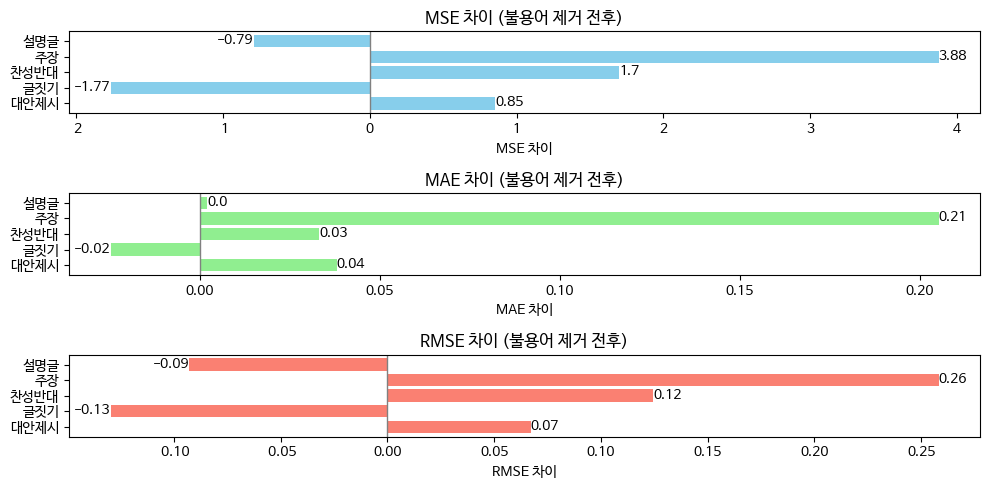

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


tasks = ['대안제시', '글짓기', '찬성반대', '주장', '설명글']


# 불용어 제거 전의 성능 지표
mse_pre = [40.1207, 47.3569, 45.7448, 54.4379, 18.5168]
mae_pre = [4.4106, 4.0152, 4.4352, 5.0977, 3.1854]
rmse_pre = [6.3341, 6.8816, 6.7635, 7.3782, 4.3031]

# 불용어 제거 후의 성능 지표
mse_post = [40.9753, 45.5899, 47.4462, 58.3146, 17.7258]
mae_post = [4.4487, 3.9905, 4.4684, 5.3030, 3.1875]
rmse_post = [6.4012, 6.7520, 6.8881, 7.6364, 4.2102]

# 성능 지표의 차이 계산
mse_diff = [post - pre for pre, post in zip(mse_pre, mse_post)]
mae_diff = [post - pre for pre, post in zip(mae_pre, mae_post)]
rmse_diff = [post - pre for pre, post in zip(rmse_pre, rmse_post)]


def add_numbers_to_bars(axes, bars, bar_values):
    for ax, bar, value in zip(axes, bars, bar_values):
        for rect in bar:
            width = rect.get_width()
            ax.text(width, rect.get_y() + rect.get_height() / 2,
                    f'{round(width, 2)}', va='center', ha='left' if width > 0 else 'right')


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

bars_mse_diff = axes[0].barh(tasks, mse_diff, color='skyblue')
axes[0].set_title('MSE 차이 (불용어 제거 전후)')
axes[0].set_xlabel('MSE 차이')
axes[0].axvline(0, color='grey', lw=1)

bars_mae_diff = axes[1].barh(tasks, mae_diff, color='lightgreen')
axes[1].set_title('MAE 차이 (불용어 제거 전후)')
axes[1].set_xlabel('MAE 차이')
axes[1].axvline(0, color='grey', lw=1)

bars_rmse_diff = axes[2].barh(tasks, rmse_diff, color='salmon')
axes[2].set_title('RMSE 차이 (불용어 제거 전후)')
axes[2].set_xlabel('RMSE 차이')
axes[2].axvline(0, color='grey', lw=1)

add_numbers_to_bars(axes, [bars_mse_diff, bars_mae_diff, bars_rmse_diff], [mse_diff, mae_diff, rmse_diff])

plt.tight_layout()
plt.show()